# Plotting Zenodo Links Over Time
This notebook opens CSV files from the `download_statistics` directory. Each file corresponds to a specific date. We will load all these files and plot the number of records over time.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path


## Load CSV Files
Load all CSV files from the `download_statistics` directory and extract the date from filenames.

In [2]:
data_folder = Path('download_statistics')
files = list(data_folder.glob('*.csv'))

data = []
for file in files:
    date = file.stem
    df = pd.read_csv(file)
    record_count = len(df)
    data.append((date, record_count))

data.sort(key=lambda x: x[0])
df_records = pd.DataFrame(data, columns=['Date', 'RecordCount'])
df_records['Date'] = pd.to_datetime(df_records['Date'])


## Plot Data
Plot the number of records over time and save the plot as `zenodo_links_over_time.png`.

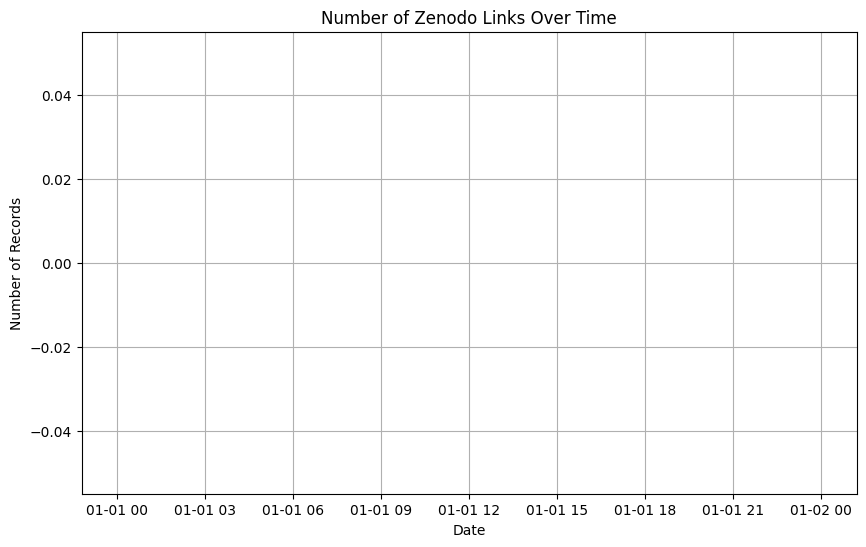

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(df_records['Date'], df_records['RecordCount'], marker='o')
plt.title('Number of Zenodo Links Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Records')
plt.grid(True)
plt.savefig('zenodo_links_over_time.png')
